# Partition explainer

This notebook demonstrates how to use the Partition explainer, which is an algorithm that uses a hierarchical clustering of the data to recursively partition the input space.

## Tabular data example

By default the `shap.Explainer` interface uses the Parition explainer algorithm only for text and image data, for tabular data the default is to use the Exact or Permutation explainers (depending on how many input features are present). The reason the permutation explainer is preferred over the Partition explainer for tabular data is that the partition explainer algorithm will often leave credit on internal nodes of the hierarchical clustering tree. This works well for text and image data where allocating credit to a contiguous chunk of the input makes sense. But for tabular data this credit sharing between input features in the same cluster can be undesirable. In contrast the Exact and Permutation explainers can still respect a hierarchical clustering tree of the input features while never leaving credit on internal nodes. Note that setting `max_evals` to infinity will make the Exact explainer, the Permutation explainer, and the Partition explainer all give the same answer, so the tradeoffs here are all about how the SHAP values are approximated with a limited number of samples.

In [1]:
import xgboost
import shap

# train XGBoost model
X,y = shap.datasets.adult()
model = xgboost.XGBClassifier().fit(X, y)

def f(x):
    return model.predict(x, output_margin=True)

# compute SHAP values for the first 500 samples
bg = shap.maskers.Partition(shap.utils.sample(X,100))
explainer = shap.explainers.Partition(f, bg)
shap_values = explainer(X[:500])

explainers.Partition is still in an alpha state, so use with caution...


ValueError: feature_names mismatch: ['Age', 'Workclass', 'Education-Num', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss', 'Hours per week', 'Country'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11']
expected Occupation, Education-Num, Capital Gain, Sex, Country, Marital Status, Race, Capital Loss, Age, Workclass, Hours per week, Relationship in input data
training data did not have the following fields: f3, f10, f0, f9, f7, f1, f6, f5, f4, f8, f2, f11

In [3]:
import xgboost
import shap

# train XGBoost model
X,y = shap.datasets.adult()
model = xgboost.XGBClassifier().fit(X, y)

def f(x):
    return model.predict(x, output_margin=True)

# compute SHAP values for the first 500 samples
bg = shap.maskers.Partition(shap.utils.sample(X,100))
explainer = shap.Explainer(f, bg)
shap_values = explainer(X[:500])

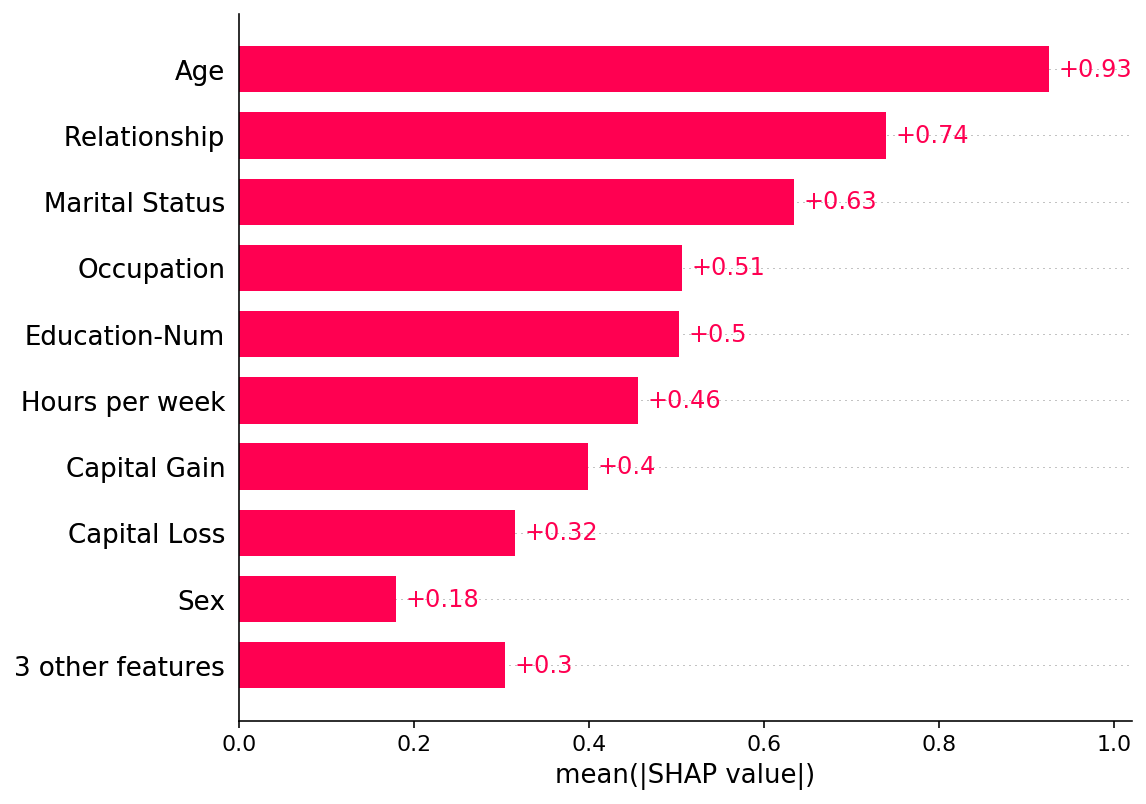

In [7]:
shap.plots.bar(shap_values)

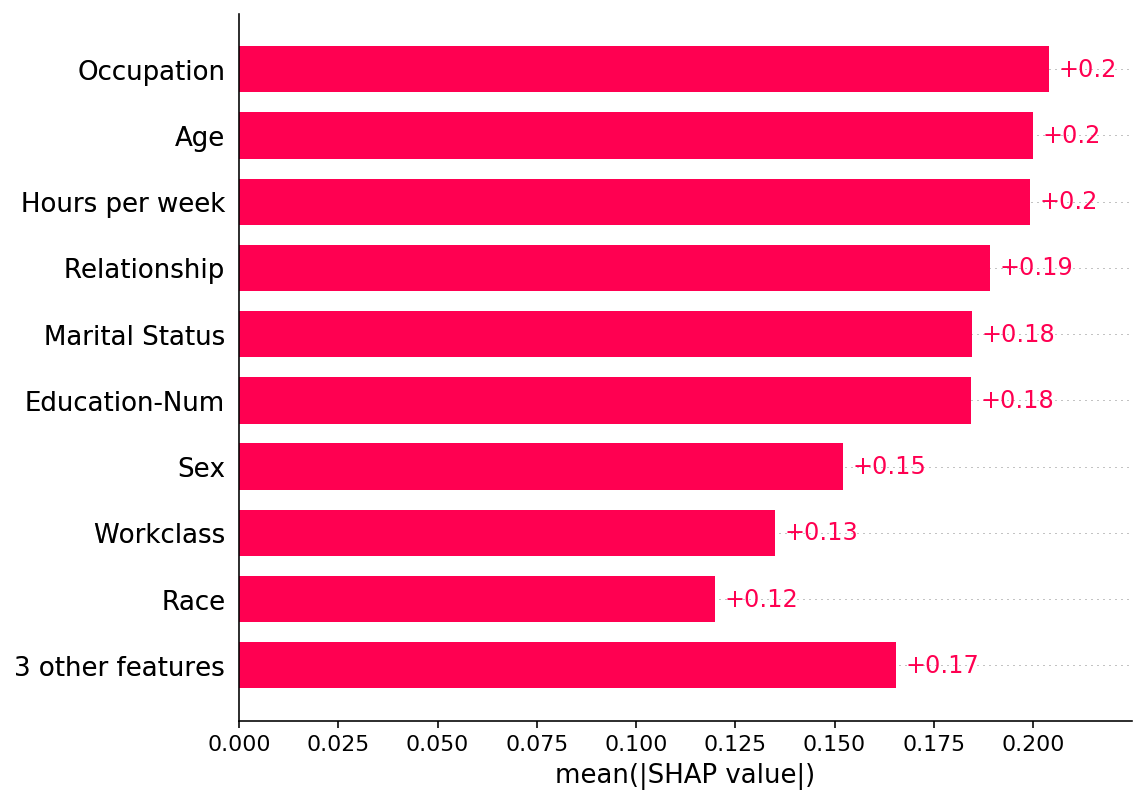

In [6]:
shap.plots.bar(shap_values)

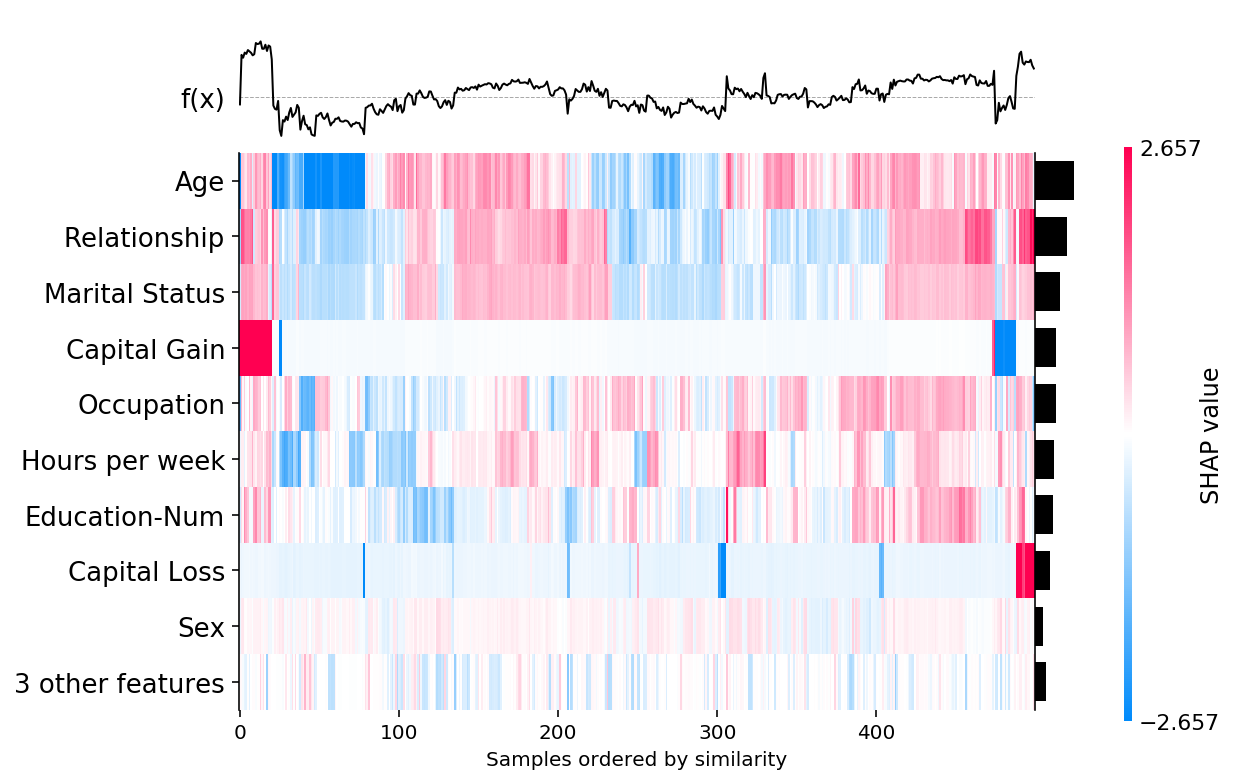

In [5]:
shap.plots.heatmap(shap_values)

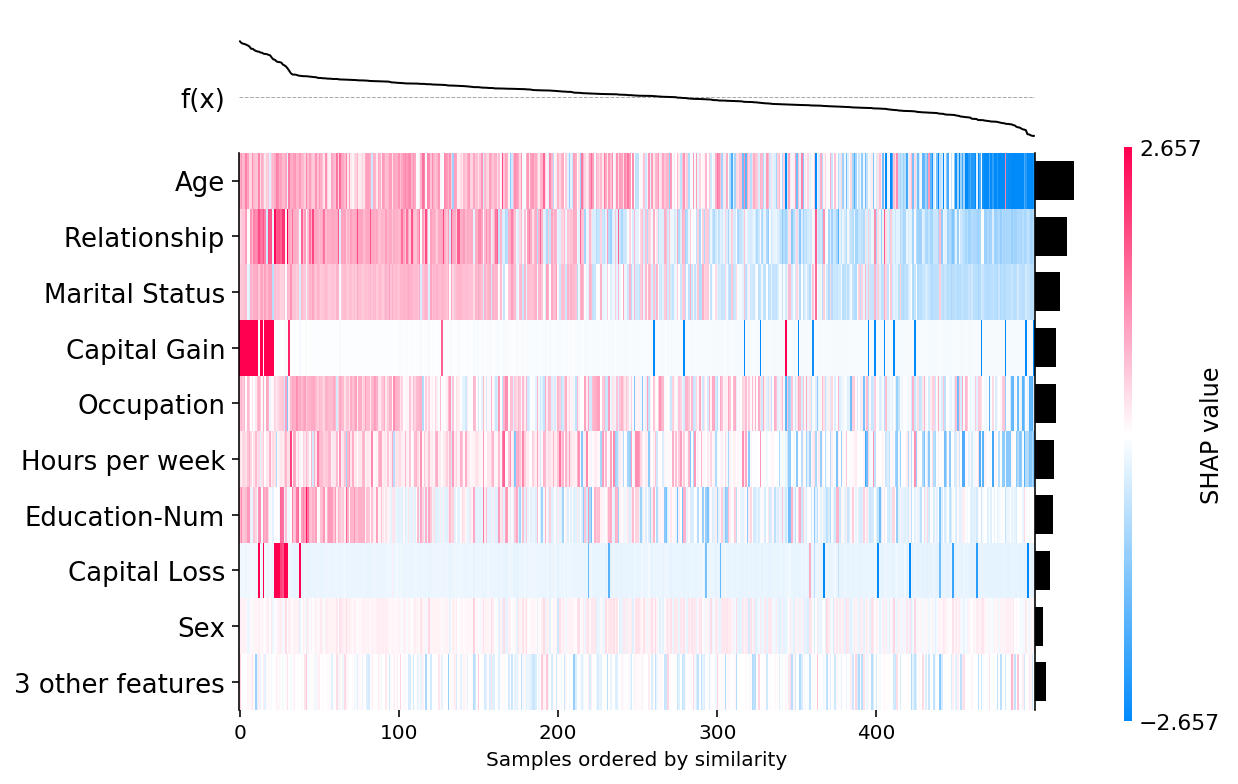

In [13]:
shap.plots.heatmap(shap_values, instance_order=shap.order.sum)

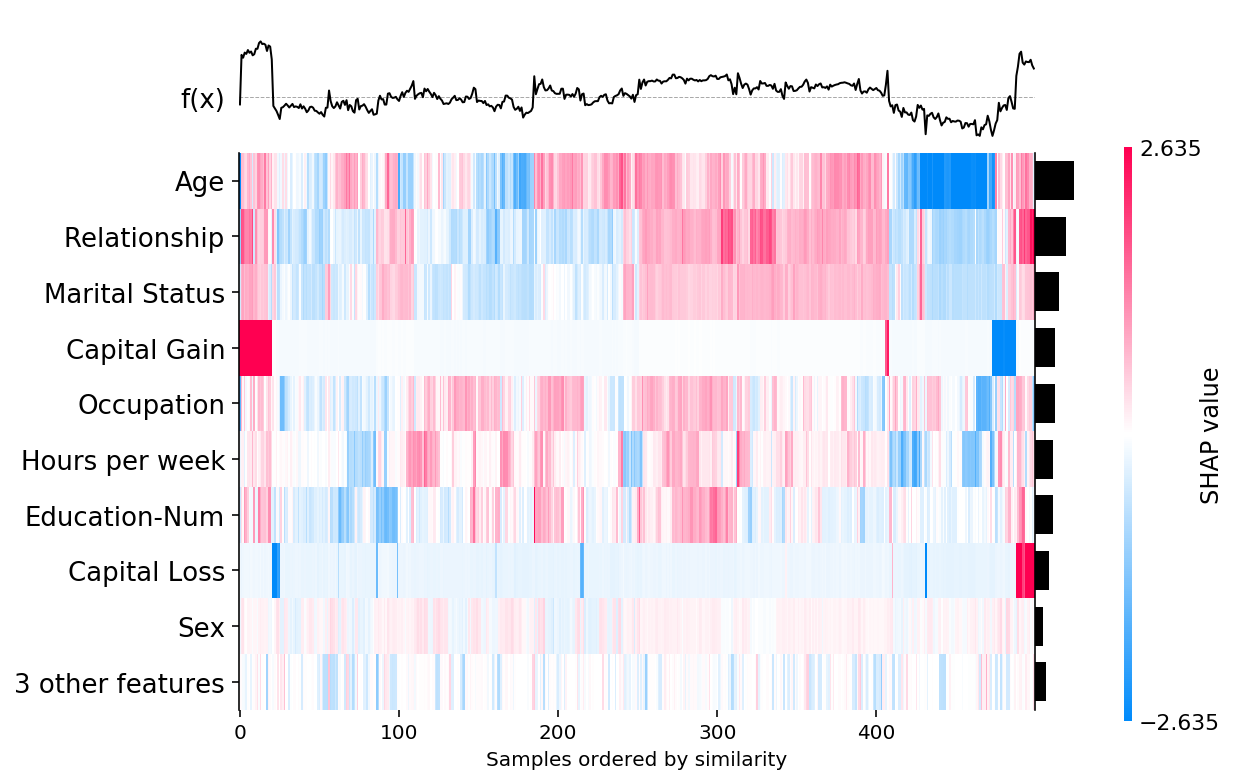

In [9]:
shap.plots.heatmap(shap_values)

In [ ]:
shap.maskers.Par